# COVID Datasets

## 20th April 2020

### Andrei Paleyes (apaleyes)

This notebook provides usage examples for Covid data set loaders stored in a python repository.

First step is to install the code.

In [1]:
%pip install git+https://github.com/DELVE-covid19/covid19_datasets.git

  Cloning https://github.com/DELVE-covid19/covid19_datasets.git to /private/var/folders/22/6ls22g994bdfdpwx4f9gcmsw0000gn/T/pip-req-build-yn4ujpeo
  Running command git clone -q https://github.com/DELVE-covid19/covid19_datasets.git /private/var/folders/22/6ls22g994bdfdpwx4f9gcmsw0000gn/T/pip-req-build-yn4ujpeo
  Created wheel for covid19-datasets: filename=covid19_datasets-0.1-py3-none-any.whl size=5388 sha256=3e260f62ca4357ee04e3272f6fb382e748518eb745c357f0b12ab32db7fb7b63
  Stored in directory: /private/var/folders/22/6ls22g994bdfdpwx4f9gcmsw0000gn/T/pip-ephem-wheel-cache-efvxot46/wheels/60/cc/74/ea0d4a72a8727aca28a8cff3500db82510ac79d72dd1870b0e
Successfully built covid19-datasets
Note: you may need to restart the kernel to use updated packages.


Now some library files for visualising the data. 

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

Just for info, we include some log messages in this usage notebook to show how the data sets are loading.

In [3]:
# optional - see log messages about datasets loading

import logging
import sys
logging.basicConfig(stream=sys.stdout, level=logging.INFO)

### Oxford Government Policy Tracker

The Oxford Government policy tracker available [here](https://www.bsg.ox.ac.uk/research/research-projects/coronavirus-government-response-tracker) allows different government responses to Covid19 be loaded in. It can be loaded from the `covid19_datasets` as follows.

In [4]:
from covid19_datasets import OxfordGovernmentPolicyDataset

/Users/neil/anaconda3/lib/python3.6/site-packages/pandas_datareader/compat/__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


You can create an instance of the data set by constructing a data set object.

In [5]:
ogp = OxfordGovernmentPolicyDataset()

INFO:covid19_datasets.oxford_government_policy:Loading dataset from https://ocgptweb.azurewebsites.net/CSVDownload
INFO:covid19_datasets.oxford_government_policy:Loaded


As an example, we'll look at policy information from South Africa. 

In [6]:
country = 'South Africa'

To share the policies, we'll use `matplotlib` to plot when different policies occured and also use print 

INFO:numexpr.utils:NumExpr defaulting to 4 threads.


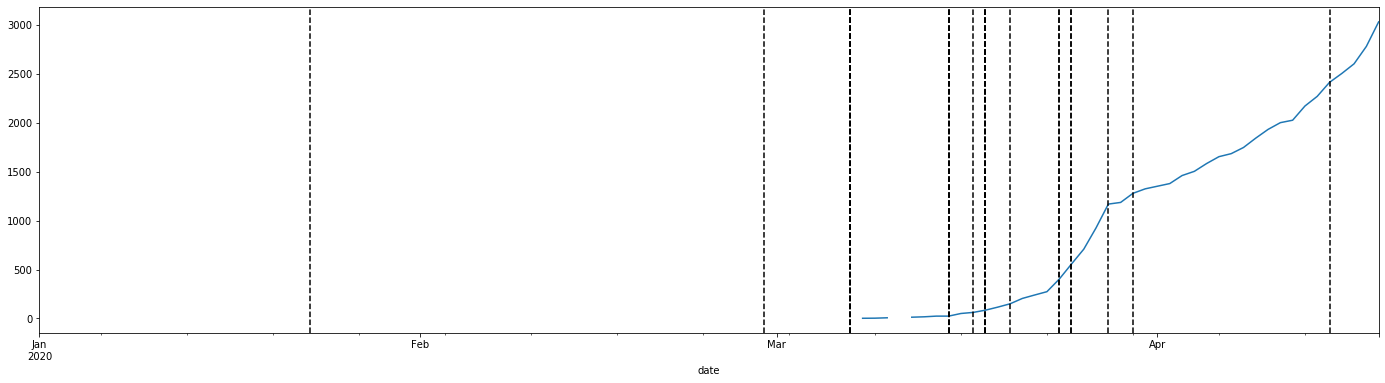

In [7]:
fig, ax = plt.subplots(figsize=(24, 6))
ogp.get_country_data(country).ConfirmedCases.plot(ax=ax)

policy_changes = ogp.get_country_policy_changes(country)

for c in policy_changes.columns:
    policy = policy_changes.loc[:, c]
    policy = policy[policy]
    if policy.any():
        for d in policy.index:
            ax.axvline(d, color='k', ls='--')

We can also cycle through the policy changes to print when different changes were made.

In [8]:
for c in policy_changes.columns:
    policy = policy_changes.loc[:, c]
    policy = policy[policy]
    if policy.any():
        for d in policy.index:
            print(f'Policy {c} changed on {d}')


Policy School closing changed on 2020-03-18 00:00:00
Policy Workplace closing changed on 2020-03-15 00:00:00
Policy Workplace closing changed on 2020-03-18 00:00:00
Policy Cancel public events changed on 2020-03-15 00:00:00
Policy Close public transport changed on 2020-03-18 00:00:00
Policy Public information campaigns changed on 2020-03-07 00:00:00
Policy Restrictions on internal movement changed on 2020-03-15 00:00:00
Policy Restrictions on internal movement changed on 2020-03-18 00:00:00
Policy International travel controls changed on 2020-01-23 00:00:00
Policy International travel controls changed on 2020-03-17 00:00:00
Policy Fiscal measures changed on 2020-03-24 00:00:00
Policy Fiscal measures changed on 2020-03-25 00:00:00
Policy Fiscal measures changed on 2020-03-30 00:00:00
Policy Monetary measures changed on 2020-02-29 00:00:00
Policy Monetary measures changed on 2020-03-07 00:00:00
Policy Monetary measures changed on 2020-03-20 00:00:00
Policy Monetary measures changed on 20

### World Bank Data

The world bank provides population data. [Andrei can you link to source here?? & Give brief overview of the data?]

In [9]:
from covid19_datasets import WorldBankDataBank, AGGREGATES

In [ ]:
wbdb = WorldBankDataBank()

INFO:covid19_datasets.world_bank:Loading dataset


In [ ]:
df = wbdb.get_data().drop(AGGREGATES).nlargest(20, "Population")

_, ax = plt.subplots(figsize=(20, 10))
ax2 = ax.twinx() # Create another axes that shares the same x-axis as ax.

df["Population"].plot(kind='bar', color='blue', ax=ax, position=1, width=0.4)
df["Population Density"].plot(kind='bar', color='orange', ax=ax2, position=0, width=0.4)

ax.set_ylabel('Population')
ax2.set_ylabel('Population Density')

plt.show()

### YouGov Behavioural Tracker

YouGov's behavioural tracker provides ... [Andrei again ... can you give info about he data source here and provide a link?]

In [ ]:
from covid19_datasets import YouGovBehaviouralTracker

In [ ]:
ygbt = YouGovBehaviouralTracker()

Here we plot information on mask usage statistics.

In [ ]:
fig, ax = plt.subplots(figsize=(24, 8))
mask_question = 'i12_health_1'
counts = ygbt.data[['country', mask_question, 'RecordNo']].groupby(['country', mask_question]).count().unstack()
normalised_counts = counts.div(counts.sum(axis=1), axis=0)
normalised_counts['RecordNo'].plot(kind='bar', stacked=True, ax=ax)
plt.title('Proportion of mask usage by country');